### Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Import the Data

In [3]:
data = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

### Settings

In [4]:
# Set ipython's max row display
pd.set_option('display.max_row', 100)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 35)

### Check the Data

In [5]:
data.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.500000,90.000000,POINT (-120.50000000000001 90),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13605159706372,136051597,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,1300 Block of STEVENSON ST,-122.421595,37.770767,POINT (-122.421594519119 37.7707674171464),32.0,1.0,10.0,20.0,8.0,2.0,9.0,28853.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
2,13618826906244,136188269,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,VALENCIA ST / DUBOCE AV,-122.422367,37.769868,POINT (-122.422367409563 37.7698682392455),NaN,3.0,5.0,20.0,8.0,4.0,5.0,28853.0,19.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN
3,4098938926105,40989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,300 Block of WOODSIDE AV,-122.452717,37.745745,POINT (-122.452716700987 37.7457451434135),49.0,7.0,8.0,38.0,1.0,5.0,4.0,59.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,5085058207021,50850582,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,0 Block of RAE AV,-122.448127,37.712164,POINT (-122.448127287476 37.7121636146229),66.0,9.0,1.0,28.0,9.0,7.0,6.0,28861.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,66.0


In [6]:
data.tail()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
2160948,16054122161030,160541221,61030,NON-CRIMINAL,"DEATH REPORT, CAUSE UNKNOWN",Monday,07/04/2016,16:08,TENDERLOIN,NONE,300 Block of ELLIS ST,-122.411988,37.785023,POINT (-122.41198764359528 37.78502266227863),20.0,5.0,10.0,36.0,14.0,10.0,9.0,28852.0,36.0,17.0,NaN,18.0,NaN,18.0,6.0,2.0,1.0,1.0,NaN,NaN,20.0
2160949,17044968764085,170449687,64085,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Thursday,06/01/2017,18:42,BAYVIEW,NONE,200 Block of WILLIAMS AV,-122.397744,37.729935,POINT (-122.39774442710336 37.729934693604356),86.0,2.0,9.0,1.0,10.0,3.0,8.0,58.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,86.0
2160950,17047243406133,170472434,6133,LARCENY/THEFT,GRAND THEFT PURSESNATCH,Friday,06/09/2017,19:10,NORTHERN,NONE,FULTON ST / GOUGH ST,-122.423355,37.778747,POINT (-122.42335514444734 37.7787466492059),22.0,4.0,11.0,9.0,7.0,9.0,11.0,28852.0,10.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,22.0
2160951,17095059363010,170950593,63010,WARRANTS,WARRANT ARREST,Wednesday,11/22/2017,14:30,MISSION,"ARREST, BOOKED",MISSION ST / 18TH ST,-122.419360,37.761836,POINT (-122.41936035276092 37.761835801237645),53.0,3.0,2.0,20.0,2.0,4.0,7.0,28859.0,19.0,13.0,NaN,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN,53.0
2160952,17608386706244,176083867,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,03/22/2017,05:29,INGLESIDE,NONE,SHOTWELL ST / STONEMAN ST,-122.414921,37.745045,POINT (-122.41492076300118 37.74504465100493),83.0,9.0,2.0,2.0,2.0,7.0,7.0,28859.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,83.0


In [7]:
data.columns

Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       

### Report the Total Number of Crimes in the Dataset

In [8]:
ttl_num = len(data)
print(ttl_num)

2160953


### Various Categories of Crime

In [9]:
cat_of_crm = sorted(data['Category'].unique())
print(cat_of_crm)

['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'SECONDARY CODES', 'SEX OFFENSES, FORCIBLE', 'SEX OFFENSES, NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']


### Number of Crimes in each Category

In [10]:
num_cri_cat = data['Category'].value_counts()
print(num_cri_cat)

LARCENY/THEFT                  477975
OTHER OFFENSES                 303027
NON-CRIMINAL                   236937
ASSAULT                        191384
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117875
VANDALISM                      114718
WARRANTS                        99821
BURGLARY                        91067
SUSPICIOUS OCC                  79740
ROBBERY                         54467
MISSING PERSON                  44268
FRAUD                           41348
FORGERY/COUNTERFEITING          22995
SECONDARY CODES                 22378
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
SEX OFFENSES, FORCIBLE          10876
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
RECOVERED VEHICLE                8688
DRIVING UNDER THE INFLUENCE      5652
KIDNAPPING                       4966
LIQUOR LAWS                      3941
ARSON       

### Count all the Different Categories of Crime

In [11]:
count_cat = len(cat_of_crm)
print(count_cat)

38


### Most Commonly Occuring Category of Crime

In [12]:
max_value = num_cri_cat.max()
print(max_value)

477975


### Least Frequentle Occuring Category of Crime

In [13]:
min_value = num_cri_cat.min()
print(min_value)

14


### Creating a DataFrame

In [14]:
col = ['Category', 'Occurences']

cri_occ = pd.DataFrame(num_cri_cat.reset_index())
cri_occ.columns = col

### Plotting a HIstogram

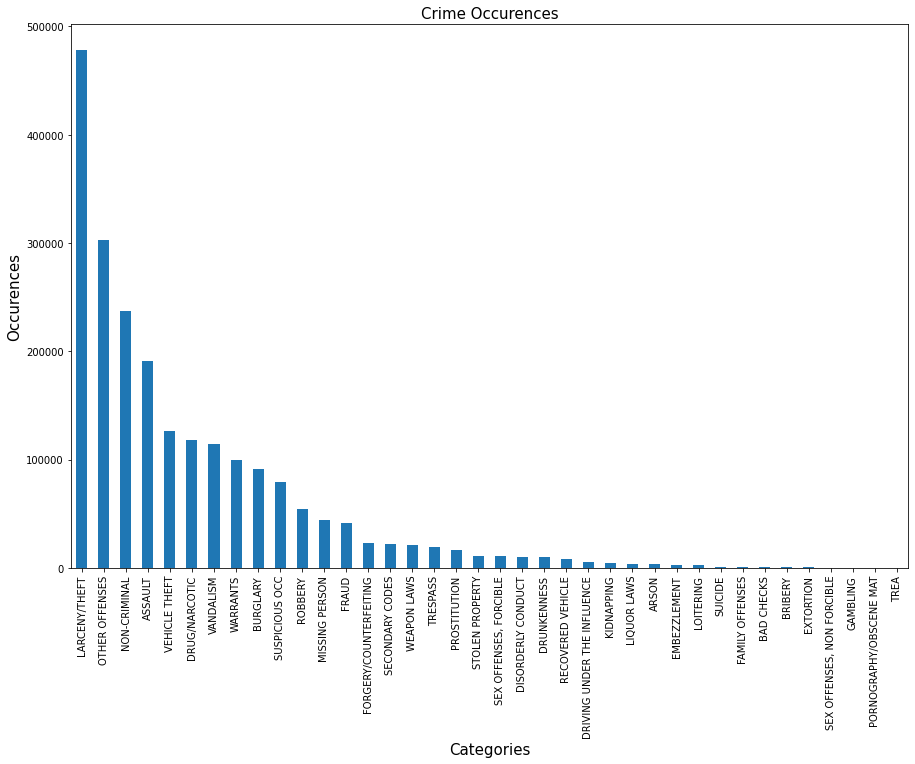

In [15]:
cri_occ.plot(kind='bar', x='Category', y='Occurences', figsize=(15,10), legend=False)

plt.title('Crime Occurences', fontsize=15)
plt.ylabel('Occurences', fontsize=15)
plt.xlabel('Categories', fontsize=15)

plt.show()

In [16]:
#Cat = data['Category']
#plt.figure(figsize=(15,10), dpi = 100)
#plt.hist(Cat, bins = CountCat, edgecolor='white')
#plt.title('Crime Occurences', fontsize=15)
#plt.ylabel('Occurences', fontsize=15)
#plt.xlabel('Categories', fontsize=15)
#plt.xticks(rotation=90)
#plt.show()

### Adding the Year Column

In [17]:
data['Year'] = data['Date'].str.strip().str[-4:]

### Number of Crimes per Year

In [18]:
num_cri_year = data['Year'].value_counts()
print(num_cri_year)

2015    153771
2017    151759
2013    149639
2016    148379
2014    147056
2003    145073
2004    144323
2005    138807
2012    137334
2008    137113
2009    136218
2006    133726
2007    133601
2010    129750
2011    128563
2018     45841
Name: Year, dtype: int64


### Average Number of Crimes per Year

In [19]:
cri_year = list(num_cri_year)
cri_year.pop()

avg_num_cri_year = sum(cri_year)/len(cri_year)
print(avg_num_cri_year)

141007.46666666667


### Focus Crimes

In [20]:
focus_crimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
focus_data = data[['Category', 'Year']].copy()
focus_data = focus_data[focus_data['Category'].isin(focus_crimes)].reset_index(drop=True)
focus_data = focus_data.drop(focus_data[focus_data['Year'] == '2018'].index)

### 14 Focus Crimes Bar Plots

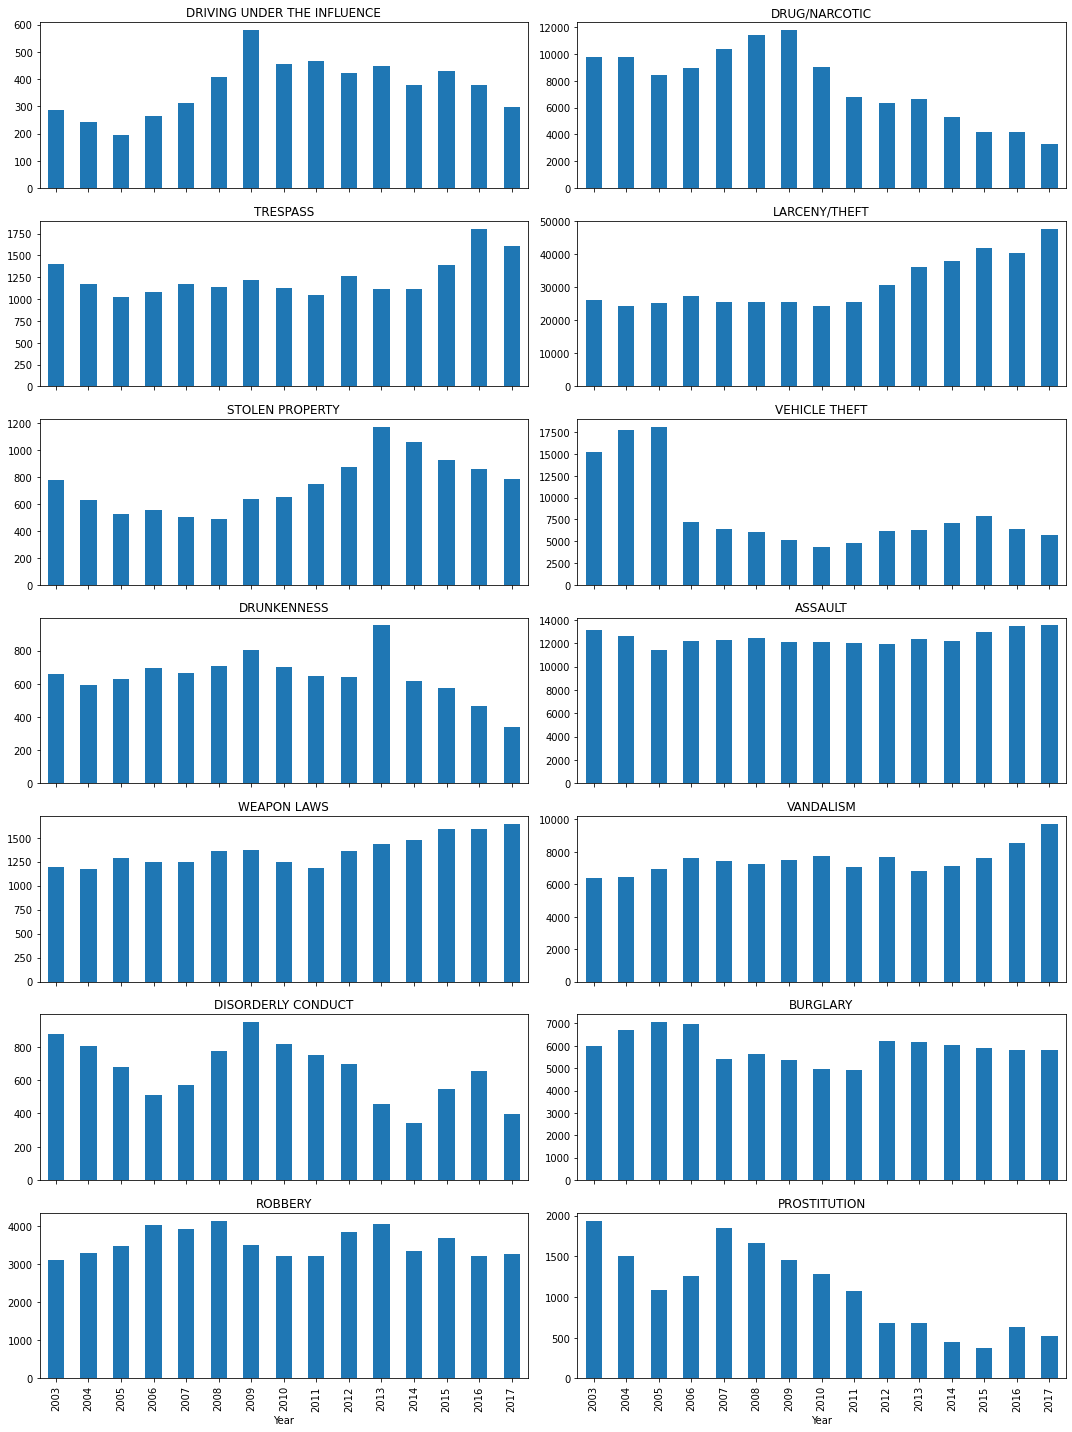

In [21]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,20), sharex=True)

col = ['Year', 'Occurences']

for i, crime in enumerate(focus_crimes):
    crime_data = focus_data[focus_data['Category'] == crime]['Year'].value_counts()
    crime_dataframe = pd.DataFrame(crime_data.reset_index())
    crime_dataframe.columns = col
    crime_dataframe = crime_dataframe.sort_values(by=['Year'])
    
    crime_dataframe.plot(kind='bar', x='Year', y='Occurences', title=crime, ax=axes[i//2,i%2], legend=False)
    
fig.tight_layout()

### Grouped Data

In [22]:
#GroupFocusData = focusData.groupby(["Category", "Year"])["Year"].count()

### Bins

In [23]:
#bins = len(focusData['Year'].unique()) - 1

### WEAPON LAWS

In [24]:
#weapon_laws = focusData[focusData['Category'] == 'WEAPON LAWS'].sort_values(by=['Year']).reset_index(drop=True)
#weapon_laws = weapon_laws.drop(weapon_laws[weapon_laws['Year'] == '2018'].index)

#plt.figure(figsize=(15,10), dpi = 100)

#plt.hist(weapon_laws['Year'], bins = bins, edgecolor='white')

#plt.title('Weapon Laws', fontsize=15)
#plt.ylabel('Occurences', fontsize=15)
#plt.xlabel('Year', fontsize=15)

#plt.xticks(rotation=90)

#plt.show()

### DRUNKENNESS

In [25]:
#drunkenness = focusData[focusData['Category'] == 'DRUNKENNESS'].sort_values(by=['Year']).reset_index(drop=True)
#drunkenness = drunkenness.drop(drunkenness[drunkenness['Year'] == '2018'].index)

#plt.figure(figsize=(15,10), dpi = 100)

#plt.hist(drunkenness['Year'], bins = bins, edgecolor='white')

#plt.title('Drunkenness', fontsize=15)
#plt.ylabel('Occurences', fontsize=15)
#plt.xlabel('Year', fontsize=15)

#plt.xticks(rotation=90)

#plt.show()

### TRESPASS

In [26]:
#trespass = focusData[focusData['Category'] == 'TRESPASS'].sort_values(by=['Year']).reset_index(drop=True)
#trespass = trespass.drop(trespass[trespass['Year'] == '2018'].index)

#plt.figure(figsize=(15,10), dpi = 100)

#plt.hist(trespass['Year'], bins = bins, edgecolor='white')

#plt.title('Trespass', fontsize=15)
#plt.ylabel('Occurences', fontsize=15)
#plt.xlabel('Year', fontsize=15)

#plt.xticks(rotation=90)

#plt.show()

### PROSTITUTION

In [27]:
#prostitution = focusData[focusData['Category'] == 'PROSTITUTION'].sort_values(by=['Year']).reset_index(drop=True)
#prostitution = prostitution.drop(prostitution[prostitution['Year'] == '2018'].index)

#plt.figure(figsize=(15,10), dpi = 100)

#plt.hist(prostitution['Year'], bins = bins, edgecolor='white')

#plt.title('Prostitution', fontsize=15)
#plt.ylabel('Occurences', fontsize=15)
#plt.xlabel('Year', fontsize=15)

#plt.xticks(rotation=90)

#plt.show()

### DRIVING UNDER THE INFLUENCE

In [28]:
#dui = focusData[focusData['Category'] == 'DRIVING UNDER THE INFLUENCE'].sort_values(by=['Year']).reset_index(drop=True)
#dui = dui.drop(dui[dui['Year'] == '2018'].index)

#plt.figure(figsize=(15,10), dpi = 100)

#plt.hist(dui['Year'], bins = bins, edgecolor='white')

#plt.title('Driving Under the Influence', fontsize=15)
#plt.ylabel('Occurences', fontsize=15)
#plt.xlabel('Year', fontsize=15)

#plt.xticks(rotation=90)

#plt.show()

### BURGLARY

In [29]:
#burglary = focusData[focusData['Category'] == 'BURGLARY'].sort_values(by=['Year']).reset_index(drop=True)
#burglary = burglary.drop(burglary[burglary['Year'] == '2018'].index)

#plt.figure(figsize=(15,10), dpi = 100)

#plt.hist(burglary['Year'], bins = bins, edgecolor='white')

#plt.title('Burglary', fontsize=15)
#plt.ylabel('Occurences', fontsize=15)
#plt.xlabel('Year', fontsize=15)

#plt.xticks(rotation=90)

#plt.show()

### ROBBERY

In [30]:
#robbery = focusData[focusData['Category'] == 'ROBBERY'].sort_values(by=['Year']).reset_index(drop=True)
#robbery = robbery.drop(robbery[robbery['Year'] == '2018'].index)

#plt.figure(figsize=(15,10), dpi = 100)

#plt.hist(robbery['Year'], bins = bins, edgecolor='white')

#plt.title('Robbery', fontsize=15)
#plt.ylabel('Occurences', fontsize=15)
#plt.xlabel('Year', fontsize=15)

#plt.xticks(rotation=90)

#plt.show()

### DRUG/NARCOTIC

In [31]:
#drug = focusData[focusData['Category'] == 'DRUG/NARCOTIC'].sort_values(by=['Year']).reset_index(drop=True)
#drug = drug.drop(drug[drug['Year'] == '2018'].index)

#plt.figure(figsize=(15,10), dpi = 100)

#plt.hist(drug['Year'], bins = bins, edgecolor='white')

#plt.title('Drug/Narcotic', fontsize=15)
#plt.ylabel('Occurences', fontsize=15)
#plt.xlabel('Year', fontsize=15)

#plt.xticks(rotation=90)

#plt.show()

### LARCENY/THEFT

In [32]:
#theft = focusData[focusData['Category'] == 'LARCENY/THEFT'].sort_values(by=['Year']).reset_index(drop=True)
#theft = theft.drop(theft[theft['Year'] == '2018'].index)

#plt.figure(figsize=(15,10), dpi = 100)

#plt.hist(theft['Year'], bins = bins, edgecolor='white')

#plt.title('Larcent/Theft', fontsize=15)
#plt.ylabel('Occurences', fontsize=15)
#plt.xlabel('Year', fontsize=15)

#plt.xticks(rotation=90)

#plt.show()

### DISORDERLY CONDUCT

In [33]:
#ds = focusData[focusData['Category'] == 'DISORDERLY CONDUCT'].sort_values(by=['Year']).reset_index(drop=True)
#ds = ds.drop(ds[ds['Year'] == '2018'].index)

#plt.figure(figsize=(15,10), dpi = 100)

#plt.hist(ds['Year'], bins = bins, edgecolor='white')

#plt.title('Disorderly Conduct', fontsize=15)
#plt.ylabel('Occurences', fontsize=15)
#plt.xlabel('Year', fontsize=15)

#plt.xticks(rotation=90)

#plt.show()

### VANDALISM

In [34]:
#vandalism = focusData[focusData['Category'] == 'VANDALISM'].sort_values(by=['Year']).reset_index(drop=True)
#vandalism = vandalism.drop(vandalism[vandalism['Year'] == '2018'].index)

#plt.figure(figsize=(15,10), dpi = 100)

#plt.hist(vandalism['Year'], bins = bins, edgecolor='white')

#plt.title('Vandalism', fontsize=15)
#plt.ylabel('Occurences', fontsize=15)
#plt.xlabel('Year', fontsize=15)

#plt.xticks(rotation=90)

#plt.show()

### VEHICLE THEFT

In [35]:
#vt = focusData[focusData['Category'] == 'VEHICLE THEFT'].sort_values(by=['Year']).reset_index(drop=True)
#vt = vt.drop(vt[vt['Year'] == '2018'].index)

#plt.figure(figsize=(15,10), dpi = 100)

#plt.hist(vt['Year'], bins = bins, edgecolor='white')

#plt.title('Vehicle Theft', fontsize=15)
#plt.ylabel('Occurences', fontsize=15)
#plt.xlabel('Year', fontsize=15)

#plt.xticks(rotation=90)

#plt.show()

### ASSAULT

In [36]:
#assault = focusData[focusData['Category'] == 'ASSAULT'].sort_values(by=['Year']).reset_index(drop=True)
#assault = assault.drop(assault[assault['Year'] == '2018'].index)

#plt.figure(figsize=(15,10), dpi = 100)

#plt.hist(assault['Year'], bins = bins, edgecolor='white')

#plt.title('Assault', fontsize=15)
#plt.ylabel('Occurences', fontsize=15)
#plt.xlabel('Year', fontsize=15)

#plt.xticks(rotation=90)

#plt.show()

### STOLEN PROPERTY

In [37]:
#sp = focusData[focusData['Category'] == 'STOLEN PROPERTY'].sort_values(by=['Year']).reset_index(drop=True)
#sp = sp.drop(sp[sp['Year'] == '2018'].index)

#plt.figure(figsize=(15,10), dpi = 100)

#plt.hist(sp['Year'], bins = bins, edgecolor='white')

#plt.title('Stolen Property', fontsize=15)
#plt.ylabel('Occurences', fontsize=15)
#plt.xlabel('Year', fontsize=15)

#plt.xticks(rotation=90)

#plt.show()